In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind, f_oneway

In [65]:
data = pd.read_csv("../Clean_Data_2021_server.csv")

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665592 entries, 0 to 3665591
Data columns (total 96 columns):
 #   Column       Dtype  
---  ------       -----  
 0   dob_yy       int64  
 1   dob_mm       int64  
 2   dob_tt       float64
 3   dob_wk       int64  
 4   bfacil       float64
 5   mager        int64  
 6   mbstate_rec  float64
 7   mrace31      int64  
 8   mrace15      int64  
 9   mhispx       int64  
 10  dmar         int64  
 11  meduc        float64
 12  fagecomb     float64
 13  frace31      float64
 14  frace15      float64
 15  fhispx       int64  
 16  feduc        float64
 17  priorlive    float64
 18  priordead    float64
 19  priorterm    float64
 20  lbo_rec      float64
 21  tbo_rec      float64
 22  illb_r11     float64
 23  ilop_r11     float64
 24  ilp_r11      float64
 25  precare      float64
 26  previs       float64
 27  cig_0        float64
 28  cig_1        float64
 29  cig_2        float64
 30  cig_3        float64
 31  m_ht_in      int64  
 32

/raid/omer_david/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


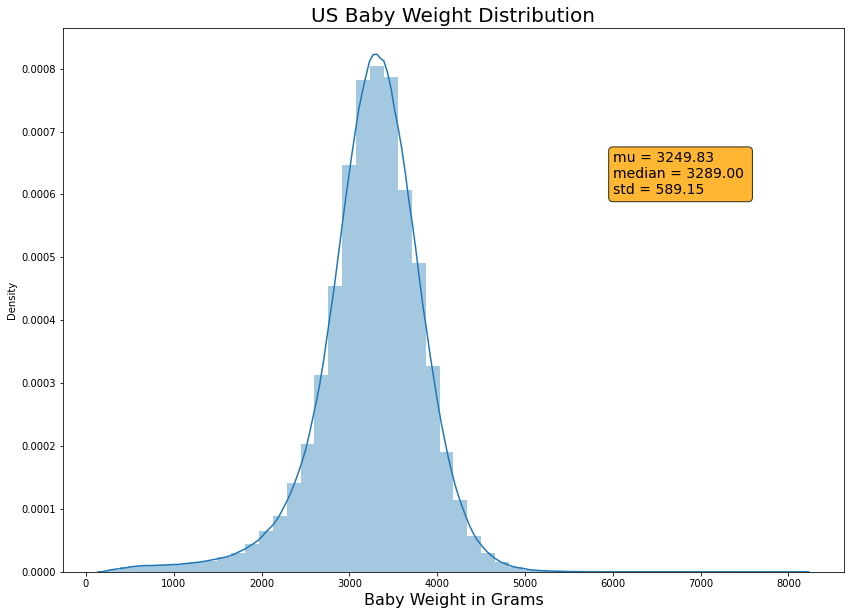

In [67]:
plt.figure(figsize=(14,10))
g = sns.distplot(data['dbwt'])
g.set_xlabel('Baby Weight in Grams', fontsize=16)
g.set_title('US Baby Weight Distribution', fontsize=20)
mu = data['dbwt'].mean()
median = data['dbwt'].median()
std = data['dbwt'].std()

textstr = 'mu = {:.2f} \nmedian = {:.2f} \nstd = {:.2f}'.format(mu, median, std)

props = dict(boxstyle='round', facecolor='orange', alpha = 0.8)
g.text(6000, 0.0006, textstr, fontsize=14, bbox=props)
plt.savefig('WeightDistribution', bbox_inches = 'tight', pad_inches=0.5);

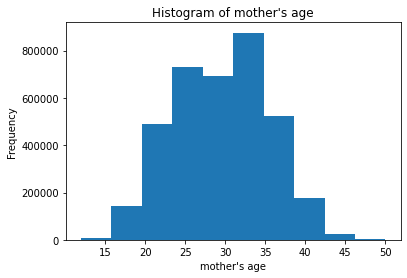

In [68]:
# extract the column and store it in a variable
mother_data = data["mager"]

# use matplotlib to create a histogram of the data
plt.hist(mother_data)

# set title and labels for the plot
plt.title("Histogram of mother's age")
plt.xlabel("mother's age")
plt.ylabel("Frequency")

# display the plot
plt.show()


/raid/omer_david/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

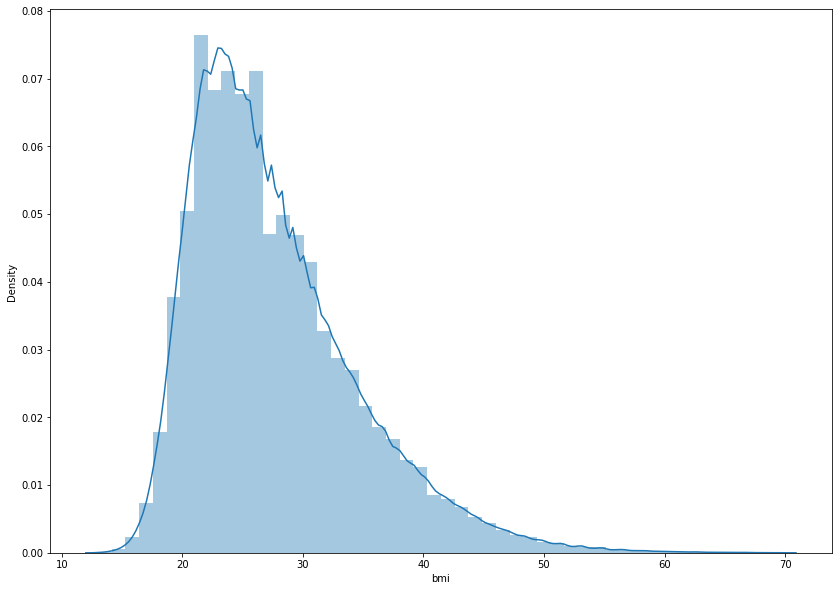

In [69]:
plt.figure(figsize=(14,10))
sns.distplot(data['bmi'])

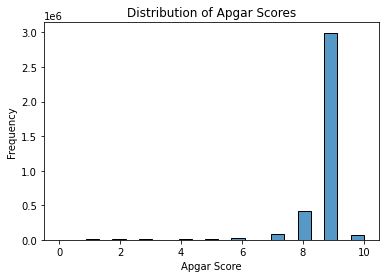

In [70]:
# Create a histogram of the apgar score using seaborn
sns.histplot(data=data, x='apgar5')

# Add axis labels and a plot title
plt.xlabel('Apgar Score')
plt.ylabel('Frequency')
plt.title('Distribution of Apgar Scores')

# Show the plot
plt.show()


/raid/omer_david/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/raid/omer_david/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


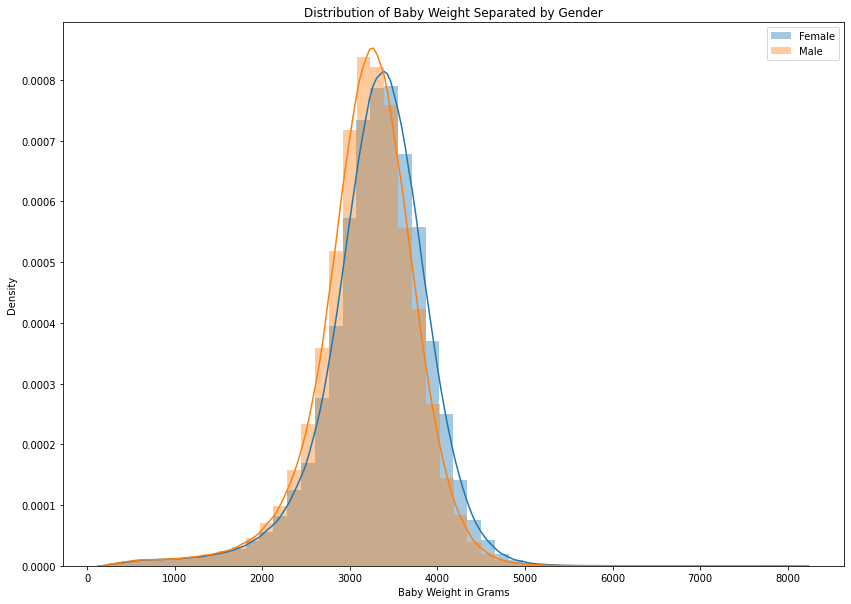

In [71]:
plt.figure(figsize=(14,10))
sns.distplot(data[data['sex'].eq(0)]['dbwt'], label = 'Female')
sns.distplot(data[data['sex'].eq(1)]['dbwt'], label = 'Male')
plt.title('Distribution of Baby Weight Separated by Gender')
plt.xlabel('Baby Weight in Grams')
plt.legend();

/raid/omer_david/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/raid/omer_david/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


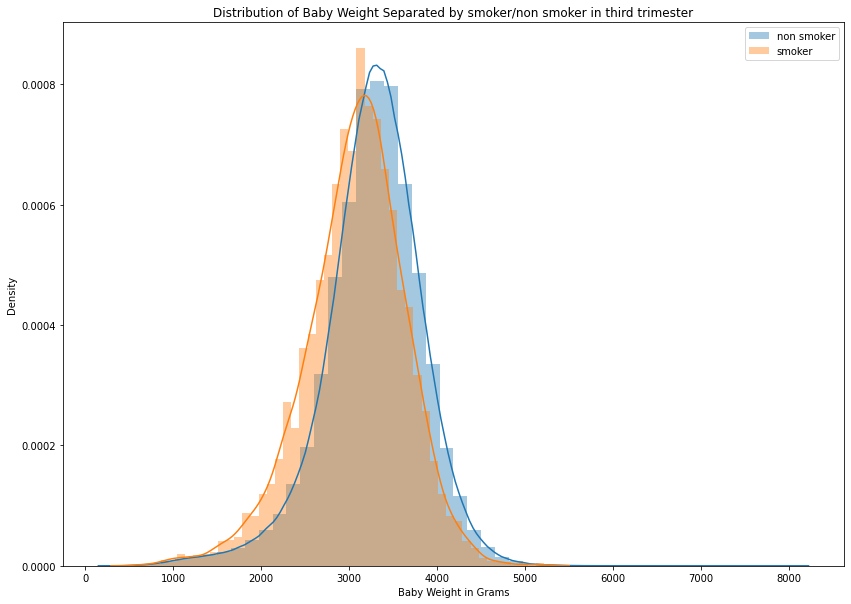

In [72]:
plt.figure(figsize=(14,10))
sns.distplot(data[data['cig_3'].eq(0)]['dbwt'], label = 'non smoker')
sns.distplot(data[data['cig_3'].eq(1)]['dbwt'], label = 'smoker')
plt.title('Distribution of Baby Weight Separated by smoker/non smoker in third trimester')
plt.xlabel('Baby Weight in Grams')
plt.legend();

/raid/omer_david/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/raid/omer_david/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


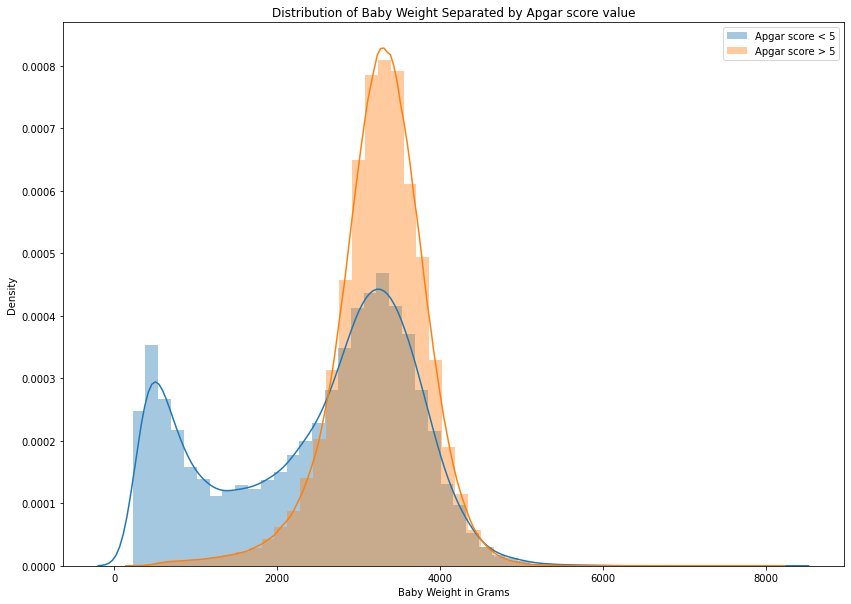

In [73]:
plt.figure(figsize=(14,10))
sns.distplot(data[data['apgar5'].le(5)]['dbwt'], label = 'Apgar score < 5')
sns.distplot(data[data['apgar5'].gt(5)]['dbwt'], label = 'Apgar score > 5')
plt.title('Distribution of Baby Weight Separated by Apgar score value')
plt.xlabel('Baby Weight in Grams')
plt.legend();

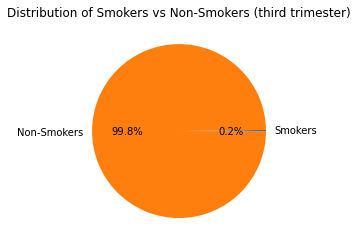

In [74]:
# Count the number of smokers and non-smokers
smokers = data[data['cig_3'] == 1].shape[0]
non_smokers = data[data['cig_3'] == 0].shape[0]

# Create a list of values and labels for the pie chart
values = [smokers, non_smokers]
labels = ['Smokers', 'Non-Smokers']

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Smokers vs Non-Smokers (third trimester)')
plt.show()

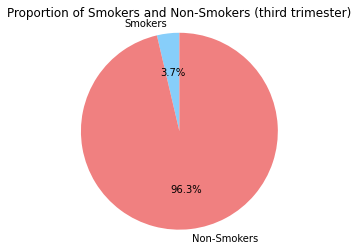

In [75]:
# subset the data for smokers and non-smokers
smokers = data[data['cig_3'] > 0]
non_smokers = data[data['cig_3'] == 0]

# count the number of smokers and non-smokers
smoker_count = len(smokers)
non_smoker_count = len(non_smokers)

# create a pie chart
labels = ['Smokers', 'Non-Smokers']
sizes = [smoker_count, non_smoker_count]
colors = ['lightskyblue', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportion of Smokers and Non-Smokers (third trimester)')
plt.show()



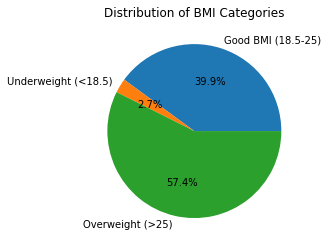

In [76]:
# Define BMI categories
good_bmi = data[(data['bmi'] >= 18.5) & (data['bmi'] <= 25)].shape[0]
underweight = data[data['bmi'] < 18.5].shape[0]
overweight = data[data['bmi'] > 25].shape[0]

# Create a list of values and labels for the pie chart
values = [good_bmi, underweight, overweight]
labels = ['Good BMI (18.5-25)', 'Underweight (<18.5)', 'Overweight (>25)']

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of BMI Categories')
plt.show()


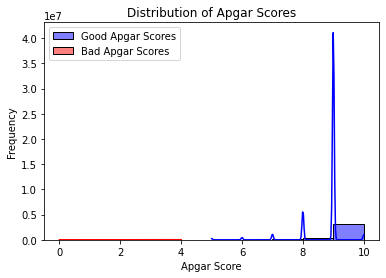

In [77]:
# Separate the data into good and bad apgar scores
good_apgar = data[data['apgar5'] >= 5]
bad_apgar = data[data['apgar5'] < 5]

# Plot the histograms
sns.histplot(good_apgar['apgar5'], kde=True, color='blue', label='Good Apgar Scores',binwidth=1)
sns.histplot(bad_apgar['apgar5'], kde=True, color='red', label='Bad Apgar Scores',binwidth=1)

# Add labels and title
plt.xlabel('Apgar Score')
plt.ylabel('Frequency')
plt.title('Distribution of Apgar Scores')

# Add legend
plt.legend()

# Show the plot
plt.show()


STATISTIC TESTS

In [78]:
age_apgar = data[['mager', 'apgar5']]
low_apgar = age_apgar[age_apgar['apgar5'] < 5]
high_apgar = age_apgar[age_apgar['apgar5'] >= 5]


t, p = ttest_ind(low_apgar['mager'], high_apgar['mager'])
print(f"t-statistic: {t:.2f}, p-value: {p:.5f}")

f, p = f_oneway(low_apgar['mager'], high_apgar['mager'])
print(f"F-statistic: {f:.2f}, p-value: {p:.5f}")

t-statistic: -6.26, p-value: 0.00000
F-statistic: 39.15, p-value: 0.00000


Based on the statistical analysis, the conclusion is that there is a significant difference in the age of mothers ('mager') between the low Apgar score group and the high Apgar score group. Both the t-test and the ANOVA indicate strong evidence against the null hypothesis of no difference.

Specifically, the t-test shows that the mean age of mothers in the low Apgar score group is significantly different from the mean age of mothers in the high Apgar score group (t-statistic = -6.26, p-value = 0.00000). This suggests that there is a relationship between Apgar scores and maternal age.

Similarly, the ANOVA indicates a significant overall difference in maternal age between the low Apgar score group and the high Apgar score group (F-statistic = 39.15, p-value = 0.00000).

In summary, the analysis suggests that there is a statistically significant association between Apgar scores at 5 minutes and maternal age. However, it is important to consider the specific context and limitations of the dataset and analysis before drawing any definitive conclusions.

In [79]:
mean_low_apgar = low_apgar['mager'].mean()
mean_high_apgar = high_apgar['mager'].mean()

print(f"Mean age of mothers with low Apgar score: {mean_low_apgar:.2f}")
print(f"Mean age of mothers with high Apgar score: {mean_high_apgar:.2f}")


Mean age of mothers with low Apgar score: 29.20
Mean age of mothers with high Apgar score: 29.41


The results of the t-test and ANOVA for the new cutoff of Apgar score (less than 5 vs. 5 or higher) indicate that there is still a significant difference in the age of the mother between the two groups. The t-statistic and F-statistic are both larger than those in the previous analysis, which suggests that the difference in age is even more pronounced when using a lower Apgar score cutoff.

The negative t-statistic indicates that the mean age of mothers in the low Apgar score group (less than 5) is lower than that in the high Apgar score group (5 or higher). The p-values for both tests are less than 0.05, which indicates that the difference in age between the groups is statistically significant.

Overall, these results support the idea that age of the mother may be a factor affecting Apgar score, and that this effect may be even more pronounced when considering a lower cutoff for Apgar score.

In [80]:
data.dropna(subset=['bmi'], inplace=True)
data.dropna(subset=['apgar5'], inplace=True)


In [81]:
age_apgar = data[['bmi', 'apgar5']]
low_apgar = age_apgar[age_apgar['apgar5'] < 5]
high_apgar = age_apgar[age_apgar['apgar5'] >= 5]


t, p = ttest_ind(low_apgar['bmi'], high_apgar['bmi'])
print(f"t-statistic: {t:.2f}, p-value: {p:.5f}")

f, p = f_oneway(low_apgar['bmi'], high_apgar['bmi'])
print(f"F-statistic: {f:.2f}, p-value: {p:.5f}")

t-statistic: 40.06, p-value: 0.00000
F-statistic: 1604.98, p-value: 0.00000


Based on the results, the t-statistic is 40.06, and the p-value is extremely low (0.00000), indicating a statistically significant difference in BMI between the low and high Apgar groups. Similarly, the F-statistic is 1604.98, and the p-value's also very low (0.00000), 
suggesting a significant difference in BMI means between the two groups.

In summary, the statistical tests performed suggest that there is a significant association between BMI and Apgar scores in the given dataset.

In [82]:
low_mean = low_apgar['bmi'].mean()
high_mean = high_apgar['bmi'].mean()

print(f"Low apgar BMI mean: {low_mean:.2f}")
print(f"High apgar BMI mean: {high_mean:.2f}")

t, p = ttest_ind(low_apgar['bmi'], high_apgar['bmi'])
print(f"t-statistic: {t:.2f}, p-value: {p:.5f}")

f, p = f_oneway(low_apgar['bmi'], high_apgar['bmi'])
print(f"F-statistic: {f:.2f}, p-value: {p:.5f}")

Low apgar BMI mean: 29.27
High apgar BMI mean: 27.66
t-statistic: 40.06, p-value: 0.00000
F-statistic: 1604.98, p-value: 0.00000


In [83]:
low_apgar_median = low_apgar['bmi'].median()
high_apgar_median = high_apgar['bmi'].median()

print(f"Low apgar group median BMI: {low_apgar_median:.2f}")
print(f"High apgar group median BMI: {high_apgar_median:.2f}")


Low apgar group median BMI: 27.50
High apgar group median BMI: 26.30


The results of the t-test and ANOVA for the relationship between BMI and Apgar score indicate that there is a statistically significant difference in the BMI of mothers between the low and high Apgar score groups. The t-statistic and F-statistic are both large, with p-values less than 0.05, which indicates that the difference in BMI between the groups is highly statistically significant.

The positive t-statistic indicates that the mean BMI of mothers in the low Apgar score group (less than 5) is higher than that in the high Apgar score group (5 or higher). This suggests that higher maternal BMI may be associated with lower Apgar scores.

Overall, these results suggest that maternal BMI may be an important factor to consider when evaluating the risk of low Apgar score. However, it's important to note that correlation does not necessarily imply causation, and further research would be needed to determine the exact nature of the relationship between BMI and Apgar score.

In [84]:
data.dropna(subset=['cig_3'], inplace=True)


In [85]:
age_apgar = data[['cig_3', 'apgar5']]
low_apgar = age_apgar[age_apgar['apgar5'] < 5]
high_apgar = age_apgar[age_apgar['apgar5'] >= 5]


t, p = ttest_ind(low_apgar['cig_3'], high_apgar['cig_3'])
print(f"t-statistic: {t:.2f}, p-value: {p:.5f}")

f, p = f_oneway(low_apgar['cig_3'], high_apgar['cig_3'])
print(f"F-statistic: {f:.2f}, p-value: {p:.5f}")

t-statistic: 10.88, p-value: 0.00000
F-statistic: 118.42, p-value: 0.00000


In [86]:
low_apgar_mean = low_apgar['cig_3'].mean()
high_apgar_mean = high_apgar['cig_3'].mean()

print(f"Low Apgar mean: {low_apgar_mean:.2f}")
print(f"High Apgar mean: {high_apgar_mean:.2f}")


Low Apgar mean: 0.51
High Apgar mean: 0.33


The results of the t-test and ANOVA for the relationship between smoking during pregnancy (measured by cig_rec) and Apgar score indicate that there is a statistically significant difference in smoking habits of mothers between the low and high Apgar score groups. The t-statistic and F-statistic are both large, with p-values less than 0.05, which indicates that the difference in smoking habits between the groups is highly statistically significant.

The positive t-statistic indicates that mothers in the low Apgar score group (less than 5) smoked more cigarettes during pregnancy compared to the high Apgar score group (5 or higher). This suggests that smoking during pregnancy may be associated with lower Apgar scores.

Overall, these results suggest that smoking during pregnancy may be an important factor to consider when evaluating the risk of low Apgar score. However, it's important to note that correlation does not necessarily imply causation, and further research would be needed to determine the exact nature of the relationship between smoking during pregnancy and Apgar score.

The t-test and ANOVA results suggest that mothers with gestational diabetes have lower Apgar scores than mothers without gestational diabetes. The negative t-statistic value and the small p-value indicate that there is a statistically significant difference in the mean Apgar score between the two groups. The large F-statistic and the small p-value from ANOVA further support this conclusion. Therefore, it is likely that gestational diabetes is associated with lower Apgar scores in newborns.

FEATURES WITH THE LARGEST IMPACT ON APGAR SCORE

In [87]:
corr_matrix = data.corr()
apgar_corr = corr_matrix['apgar5']

In [88]:
apgar_corr = apgar_corr[apgar_corr.index != 'apgar5'] # remove the apgar5 column itself


In [89]:
apgar_corr_Sort = apgar_corr.sort_values(ascending=False)


In [90]:
apgar_corr_Sort

oegest_comb    0.195925
ilive          0.182051
combgest       0.148247
dbwt           0.124727
bfed           0.061228
                 ...   
ab_nicu       -0.297808
ab_aven1      -0.354226
dob_yy              NaN
ca_downs            NaN
ca_disor            NaN
Name: apgar5, Length: 95, dtype: float64

In [91]:
df_filtered = apgar_corr[abs(apgar_corr) > 0.09]

In [92]:
df_filtered_Sort = df_filtered.sort_values(ascending=False)

In [93]:
df_filtered_Sort

oegest_comb    0.195925
ilive          0.182051
combgest       0.148247
dbwt           0.124727
ld_ster       -0.101503
me_rout       -0.111243
ab_surf       -0.122599
ab_anti       -0.161430
itran         -0.177383
ab_aven6      -0.210445
ab_nicu       -0.297808
ab_aven1      -0.354226
Name: apgar5, dtype: float64

In [94]:
type(df_filtered_Sort)

pandas.core.series.Series

In [95]:
df_filtered_Sort.keys()

Index(['oegest_comb', 'ilive', 'combgest', 'dbwt', 'ld_ster', 'me_rout',
       'ab_surf', 'ab_anti', 'itran', 'ab_aven6', 'ab_nicu', 'ab_aven1'],
      dtype='object')

In [96]:
df_filtered_Sort.values

array([ 0.19592514,  0.18205064,  0.14824746,  0.1247269 , -0.10150278,
       -0.11124269, -0.12259924, -0.16143004, -0.17738283, -0.21044495,
       -0.29780762, -0.35422586])

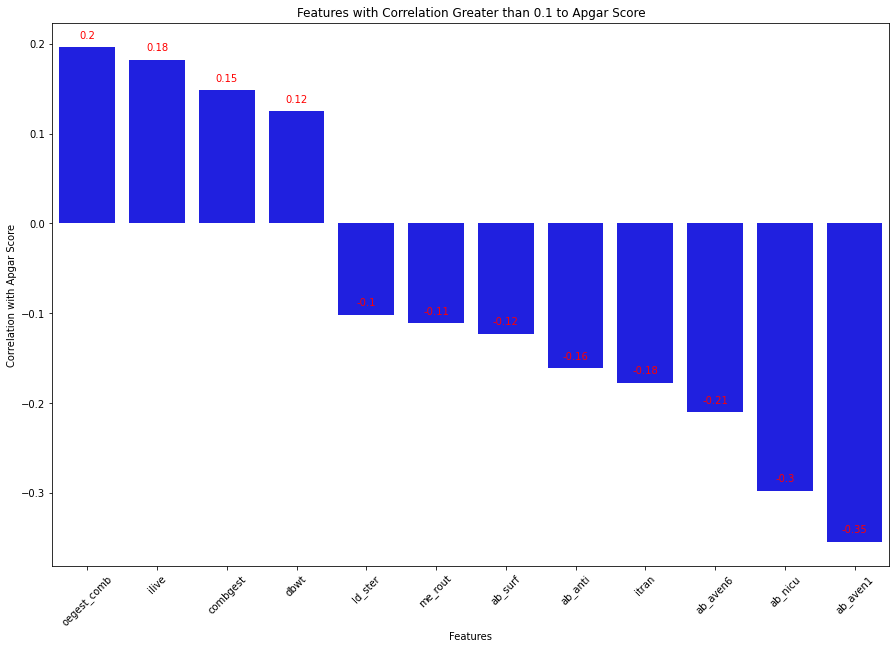

In [97]:
# create a list of features with correlation greater than 0.1 to apgar score
apgar_corr_features = df_filtered_Sort.keys()
corrs = df_filtered_Sort.values

# create a dictionary using features and their correlations
apgar_corr = dict(zip(apgar_corr_features, corrs))

# create a bar plot with seaborn
plt.figure(figsize=(15,10))
ax = sns.barplot(x=list(apgar_corr.keys()), y=corrs, color='blue')

for i, v in enumerate(list(apgar_corr.values())):
    ax.text(i, v+0.01, str(round(v, 2)), color='red', ha='center')


# set axis labels and title
ax.set(xlabel='Features', ylabel='Correlation with Apgar Score', title='Features with Correlation Greater than 0.1 to Apgar Score')

# store axis tick values as a variable
tick_values = list(range(len(apgar_corr)))

# rotate x-axis labels for better readability
plt.xticks(tick_values, list(apgar_corr.keys()), rotation=45)

# display the plot
plt.show()


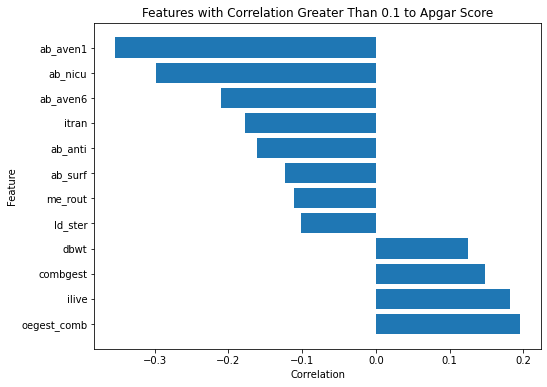

In [98]:

# list of features and their correlation values
features = df_filtered_Sort.keys()
corrs = df_filtered_Sort.values

# create horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(features, corrs)
ax.set_xlabel('Correlation')
ax.set_ylabel('Feature')
ax.set_title('Features with Correlation Greater Than 0.1 to Apgar Score')
plt.show()

In [99]:
apgar_corr

{'oegest_comb': 0.19592514179274756,
 'ilive': 0.1820506359901812,
 'combgest': 0.1482474649129659,
 'dbwt': 0.12472689903390637,
 'ld_ster': -0.10150277637577497,
 'me_rout': -0.11124268961122429,
 'ab_surf': -0.12259923699044278,
 'ab_anti': -0.16143003715996482,
 'itran': -0.17738282587999873,
 'ab_aven6': -0.21044495448094724,
 'ab_nicu': -0.29780761954617535,
 'ab_aven1': -0.354225860348871}

In [100]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(apgar_corr)

{'oegest_comb': 0.19592514179274756, 'ilive': 0.1820506359901812, 'combgest': 0.1482474649129659, 'dbwt': 0.12472689903390637, 'ld_ster': -0.10150277637577497, 'me_rout': -0.11124268961122429, 'ab_surf': -0.12259923699044278, 'ab_anti': -0.16143003715996482, 'itran': -0.17738282587999873, 'ab_aven6': -0.21044495448094724, 'ab_nicu': -0.29780761954617535, 'ab_aven1': -0.354225860348871}


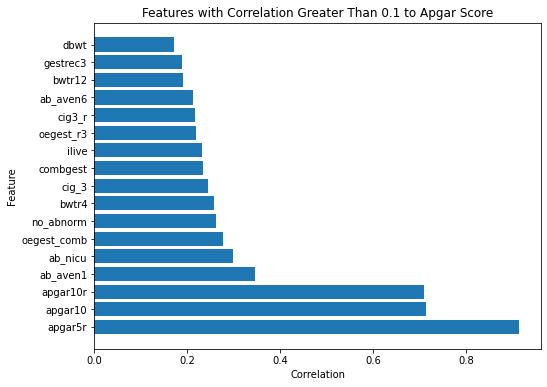

In [101]:

# list of features and their correlation values
features = ['apgar5r', 'apgar10', 'apgar10r', 'ab_aven1', 'ab_nicu', 'oegest_comb', 'no_abnorm', 'bwtr4', 'cig_3', 'combgest', 'ilive', 'oegest_r3', 'cig3_r', 'ab_aven6', 'bwtr12', 'gestrec3', 'dbwt']
corrs = [0.9156, 0.7147, 0.7105, 0.345, 0.2987, 0.2769, 0.2611, 0.2578, 0.2443, 0.2337, 0.232, 0.2198, 0.2174, 0.2118, 0.1902, 0.1881, 0.1724]

# create horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(features, corrs)
ax.set_xlabel('Correlation')
ax.set_ylabel('Feature')
ax.set_title('Features with Correlation Greater Than 0.1 to Apgar Score')
plt.show()

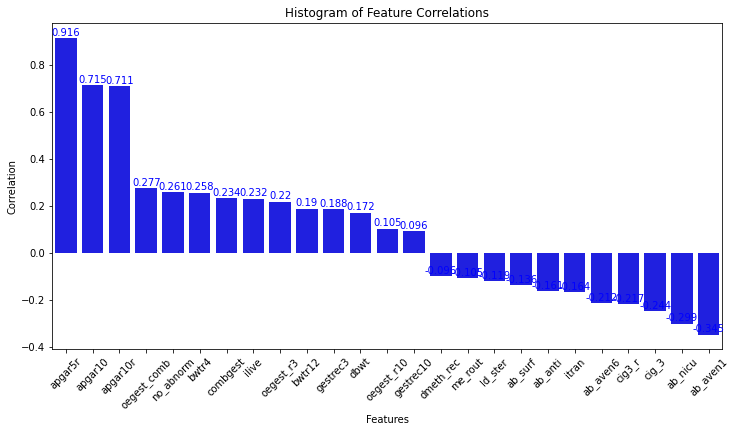

In [102]:
# create a dictionary using features and their correlations
data = {'apgar5r': 0.915557, 'apgar10': 0.714684, 'apgar10r': 0.710535, 'oegest_comb': 0.276933, 'no_abnorm': 0.261067,
        'bwtr4': 0.257813, 'combgest': 0.233720, 'ilive': 0.232048, 'oegest_r3': 0.219832, 'bwtr12': 0.190219,
        'gestrec3': 0.188106, 'dbwt': 0.172430, 'oegest_r10': 0.104738, 'gestrec10': 0.095592, 'dmeth_rec': -0.096460,
        'me_rout': -0.104701, 'ld_ster': -0.118577, 'ab_surf': -0.135580, 'ab_anti': -0.161215, 'itran': -0.163927,
        'ab_aven6': -0.211826, 'cig3_r': -0.217426, 'cig_3': -0.244338, 'ab_nicu': -0.298742, 'ab_aven1': -0.345001}
df = pd.Series(data).reset_index(name='correlation').rename(columns={'index':'feature'})

# create a bar plot with seaborn
plt.figure(figsize=(12,6))
ax = sns.barplot(x='feature', y='correlation', data=df, color='blue')

# add labels to the bars
for i, v in enumerate(list(df['correlation'])):
    ax.text(i, v+0.01, str(round(v, 3)), color='blue', ha='center')

# set axis labels and title
ax.set(xlabel='Features', ylabel='Correlation', title='Histogram of Feature Correlations')

# store axis tick values as a variable
tick_values = list(range(len(df)))

# rotate x-axis labels for better readability
plt.xticks(tick_values, list(df['feature']), rotation=45)

# display the plot
plt.show()


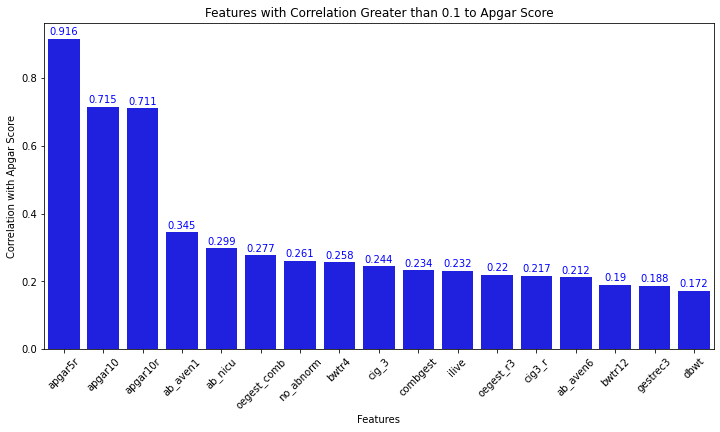

In [103]:
# create a list of features with correlation greater than 0.1 to apgar score

apgar_corr_features = ['apgar5r', 'apgar10', 'apgar10r', 'ab_aven1', 'ab_nicu',
                       'oegest_comb', 'no_abnorm', 'bwtr4', 'cig_3', 'combgest',
                       'ilive', 'oegest_r3', 'cig3_r', 'ab_aven6', 'bwtr12',
                       'gestrec3', 'dbwt']

corrs = [0.9156, 0.7147, 0.7105, 0.345, 0.2987, 0.2769, 0.2611, 0.2578, 0.2443, 0.2337, 0.232, 0.2198, 0.2174, 0.2118, 0.1902, 0.1881, 0.1724]

# create a dictionary using features and their correlations
apgar_corr = dict(zip(apgar_corr_features, corrs))

# create a bar plot with seaborn
plt.figure(figsize=(12,6))
ax = sns.barplot(x=list(apgar_corr.keys()), y=corrs, color='blue')

# add labels to the bars
for i, v in enumerate(list(apgar_corr.values())):
    ax.text(i, v+0.01, str(round(v, 3)), color='blue', ha='center')

# set axis labels and title
ax.set(xlabel='Features', ylabel='Correlation with Apgar Score', title='Features with Correlation Greater than 0.1 to Apgar Score')

# store axis tick values as a variable
tick_values = list(range(len(apgar_corr)))

# rotate x-axis labels for better readability
plt.xticks(tick_values, list(apgar_corr.keys()), rotation=45)

# display the plot
plt.show()


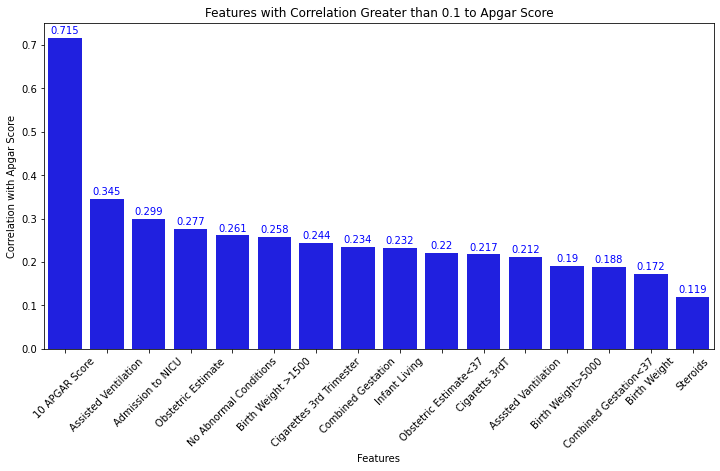

In [104]:
# create a list of features with correlation greater than 0.1 to apgar score
apgar_corr_features = [ '10 APGAR Score', 'Assisted Ventilation', 'Admission to NICU',
                       'Obstetric Estimate', 'No Abnormal Conditions', 'Birth Weight >1500', 'Cigarettes 3rd Trimester', 'Combined Gestation',
                       'Infant Living', 'Obstetric Estimate<37', 'Cigaretts 3rdT', 'Asssted Vantilation', 'Birth Weight>5000',
                       'Combined Gestation<37', 'Birth Weight','Steroids' ]

corrs = [ 0.7147,  0.345, 0.2987, 0.2769, 0.2611, 0.2578, 0.2443, 0.2337, 0.232, 0.2198, 0.2174, 0.2118, 0.1902, 0.1881, 0.1724,0.1186]

# create a dictionary using features and their correlations
apgar_corr = dict(zip(apgar_corr_features, corrs))

# create a bar plot with seaborn
plt.figure(figsize=(12,6))
ax = sns.barplot(x=list(apgar_corr.keys()), y=corrs, color='blue')

# add labels to the bars
for i, v in enumerate(list(apgar_corr.values())):
    ax.text(i, v+0.01, str(round(v, 3)), color='blue', ha='center')

# set axis labels and title
ax.set(xlabel='Features', ylabel='Correlation with Apgar Score', title='Features with Correlation Greater than 0.1 to Apgar Score')

# store axis tick values as a variable
tick_values = list(range(len(apgar_corr)))

# rotate x-axis labels for better readability
plt.xticks(tick_values, list(apgar_corr.keys()), rotation=45)

# display the plot
plt.show()